
# TripAdvisor Rating

<p><b>TripAdvisor</b> — американский сайт путешествий. Даёт своим пользователям возможность спланировать поездку в любую страну мира.</p>
<img src="http://tmb-city.ru/wp-content/uploads/2013/11/Quo-Vladis-London1.jpg">

Признаки, которые есть в наборе данных
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

# import

In [1]:
# Загрузка библиотек

from sklearn.model_selection import train_test_split
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:

In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# Дополнительные функции и словари

In [4]:
# Функция для окруления результата предсказания
def round_of_rating(number):
    """
    Округляем до 0.5
    """
    return np.round(number * 2) / 2


# Словарь соответствия городов и стран
dict_country = {'Amsterdam': 'Holland',  'Athens': 'Greece', 'Barcelona': 'Spain', 'Berlin': 'German', 'Bratislava': 'Slovakia',
                'Brussels': 'Belgium', 'Budapest': 'Hungary', 'Copenhagen': 'Denmark', 'Dublin': 'Ireland',
                'Edinburgh': 'Scotland', 'Geneva': 'Switzerland', 'Hamburg': 'German', 'Helsinki': 'Finland', 'Krakow': 'Poland',
                'Lisbon': 'Portugal', 'Ljubljana': 'Slovenia', 'London': 'Britain', 'Luxembourg': 'Luxembourg', 'Lyon': 'France',
                'Madrid': 'Spain', 'Milan': 'Italy', 'Munich': 'German', 'Oporto': 'Portugal', 'Oslo': 'Norway', 'Paris': 'France',
                'Prague': 'Czech', 'Rome': 'Italy', 'Stockholm': 'Sweden', 'Vienna': 'Austria', 'Warsaw': 'Poland',
                'Zurich': 'Switzerland'}

# Словарь соответствия стран и ВВП
dict_vvp = {'Austria': 52.813, 'Belgium': 49.912, 'Britain': 46.870, 'Czech': 39.511, 'Denmark': 53.449, 'Finland': 48.098,
            'France': 47.322, 'German': 54.874, 'Greece': 30.501, 'Holland': 58.095, 'Hungary': 33.033, 'Ireland': 83.001,
            'Italy': 40.923, 'Luxembourg': 113.550, 'Norway': 76.243, 'Poland': 33.072, 'Portugal': 33.211, 'Scotland': 45.904,
            'Slovakia': 36.878, 'Slovenia': 38.343, 'Spain': 41.998, 'Sweden': 54.666, 'Switzerland': 65.077}


# функция для получения основной информации для числовых переменных
def info_digital(x):
    print('Количество пропущенных значений:', pd.isnull(x).sum())
    print('\nРасспределение уникальных значений:')
    display(pd.DataFrame(pd.value_counts(x)))
    print('Основная статистика:')
    display(pd.DataFrame(x.describe()))
    plt.hist(x)
    plt.title('Гистограмма')


# функция, возвращающая границы для удаления выбросов
def interval_vaubros(x):
    median = pd.DataFrame(x).median()[0]
    IQR = pd.DataFrame(x).quantile(0.75)[0] - pd.DataFrame(x).quantile(0.25)[0]
    perc25 = pd.DataFrame(x).quantile(0.25)[0]
    perc75 = pd.DataFrame(x).quantile(0.75)[0]
    f = perc25 - 1.5*IQR
    l = perc75 + 1.5*IQR
    return(f, l)


# Функция для исследования данных на выбросы
def vubros(x):
    median = pd.DataFrame(x).median()[0]
    IQR = pd.DataFrame(x).quantile(0.75)[0] - pd.DataFrame(x).quantile(0.25)[0]
    perc25 = pd.DataFrame(x).quantile(0.25)[0]
    perc75 = pd.DataFrame(x).quantile(0.75)[0]
    df = pd.Series(x).loc[pd.Series(x).between(
        perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    plt.hist(df, bins=10, range=(0, (perc75 + 1.5*IQR)*1.2), label='IQR')
    plt.legend()

# DATA

In [5]:
# Считывание данных
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [6]:
# Посмотрим общую информацию о данных
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


Видно, что колонки <code>Cuisine Style</code>, <code> Price Range</code> и <code>Number of Reviews</code>

In [7]:
# Обучающий набор данных
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [8]:
# Тестовый набор данных
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [9]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [10]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [11]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [12]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [14]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
4979,id_4979,London,"['Mexican', 'Latin', 'South American', 'Centra...",411.0,$$ - $$$,2632.0,"[['Cool place in the centre of Theatre Land', ...",/Restaurant_Review-g186338-d1826610-Reviews-Ca...,d1826610,0,0.0
6095,id_6095,London,"['Chinese', 'Asian']",13354.0,$$ - $$$,32.0,"[['Authentic but basic Chinese restaurant', 'F...",/Restaurant_Review-g186338-d11862682-Reviews-L...,d11862682,0,0.0
37907,id_2471,Paris,"['Chinese', 'Asian', 'Vegetarian Friendly']",2472.0,$$ - $$$,152.0,"[['Very good', 'My go to Chinese in Paris!'], ...",/Restaurant_Review-g187147-d718781-Reviews-Lao...,d718781,1,4.0
23488,id_1102,Vienna,NaN,1103.0,NaN,30.0,"[['Good value pub', 'famous'], ['12/30/2016', ...",/Restaurant_Review-g190454-d2208694-Reviews-Ro...,d2208694,1,4.0
21906,id_1872,Prague,['Cafe'],1875.0,NaN,NaN,"[[], []]",/Restaurant_Review-g274707-d7123545-Reviews-Pa...,d7123545,1,5.0


In [15]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

# Cleaning and Prepping Data

Посмотрим, какие признаки у нас категориальные, а какие числовые.

In [16]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

### Number of Reviews

In [17]:
#Создадим новый признак для отсутствующих значений столбца
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

Количество пропущенных значений: 3200

Расспределение уникальных значений:


,Number of Reviews
2.0,2403
3.0,2042
4.0,1707
5.0,1471
6.0,1258
...,...
5216.0,1
1932.0,1
1050.0,1
1145.0,1


Основная статистика:


,Number of Reviews
count,46800.000000
mean,124.471197
std,294.114345
min,2.000000
25%,9.000000
50%,33.000000
75%,115.000000
max,9660.000000


C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


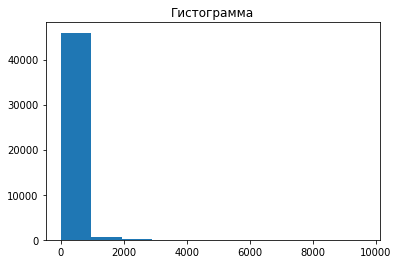

In [18]:
#Посмотрим общую информацию о признаке
info_digital(data['Number of Reviews'])

25-й перцентиль: 9.0, 75-й перцентиль: 115.0, IQR: 106.0,  Границы выбросов: [-150.0, 274.0].


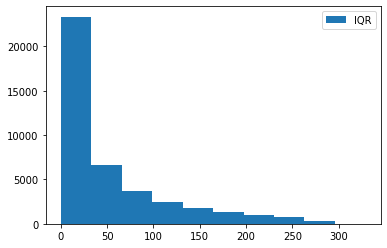

In [19]:
#Исследуем признак на выбросы
interval_vaubros(data['Number of Reviews'])
vubros(data['Number of Reviews'])

Выбросы есть, но попытка от них избавится, привела к ухудшению качества модели.

In [20]:
# Заполняем пропуски 0
data['Number of Reviews'].fillna(0, inplace=True)

### Cuisine Style

In [21]:
data['Cuisine Style'].value_counts()

['Italian']                                                                              1332
['French']                                                                               1019
['Spanish']                                                                               860
['French', 'European']                                                                    503
['Cafe']                                                                                  500
                                                                                         ... 
['Italian', 'Indian', 'Bar', 'International', 'Vegetarian Friendly', 'Vegan Options']       1
['Bar', 'Cafe', 'European', 'Swedish', 'Scandinavian', 'Pub', 'Vegetarian Friendly']        1
['International', 'Contemporary', 'Fusion']                                                 1
['Vietnamese', 'Fusion', 'Vegetarian Friendly']                                             1
['Italian', 'European', 'Wine Bar']                         

Все пропущенные значения были заменены модой по каждому городу в отдельности

In [22]:
# Создаем словарь, город и соответствующая наиболее распространенная кухня
cuisin = {}
for i in data['City'].unique().tolist():
    cuisin[i] = data[data['City'] == i]['Cuisine Style'].mode()[0]

mask = data['Cuisine Style'].astype('str').isin(['NaN', 'nan'])
data.loc[mask, 'Cuisine Style'] = data.loc[mask,'City'].map(cuisin)

# какие кухни представлены в ресторанах
# создадим список всех кухонь
list_cuisin = []
for c in data[data['Cuisine Style'].isnull() == False]['Cuisine Style'].tolist():
    s = c[1:-1].split(',')
    for x in s:
        x = x.strip()
        if x[1:-1] not in list_cuisin:
            list_cuisin.append(x[1:-1])
# Функция для формирования новых признаков, 0 если такой кухни в ресторане нет и 1 если есть.
def find_item(cell):
    if item in cell:
        return 1
    return 0

for item in list_cuisin:
    data[item] = data['Cuisine Style'].apply(find_item)
data['Cuisine Style'] = (data['Cuisine Style'].str.count(',')+1)
data['Cuisine Style'].fillna(1, inplace=True)

### City  и ВВП

Город в котором расположен ресторан

In [23]:
data['City'].value_counts()

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: City, dtype: int64

Видно, что не только Европейские столицы представлены в данных. Т.к. рейтинг ресторана может зависеть от уровня развития страны, то было выдвинуто предположение, что ВВП страны может влиять на рейтинг ресторанов в пределах своей территории. Поэтому был добавлен признак числовой ВВП. Который помог улучшить качество модели.

In [24]:
# Новый столбец - страна, на основании которого будет создаваться колонка ВВП
data['country'] = data['City'].map(dict_country)

# Создаем новый столбец, ВВП на душу населения
# https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D1%80%D0%B0%D0%BD%D1%8B_%D0%95%D0%B2%D1%80%D0%BE%D0%BF%D1%8B_%D0%BF%D0%BE_%D0%92%D0%92%D0%9F_(%D0%9F%D0%9F%D0%A1)_%D0%BD%D0%B0_%D0%B4%D1%83%D1%88%D1%83_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F
data['vvp'] = data['country'].map(dict_vvp)

In [25]:
# Создаем список из всех городов
city_list = data['City'].tolist()
# Создаем признак для каждого города
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [26]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,2,12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,5,106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,1,810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,5,1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,6,37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


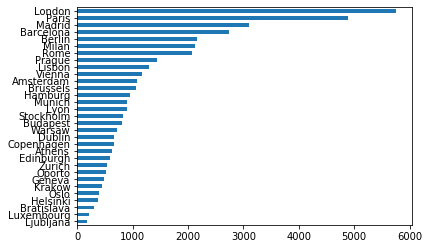

In [27]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

На самом деле, то, что Лондон имеет больше ресторанов, не удивительно. Т.к. от туда родом Гордон Рамзи)

### Price Range 

In [28]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [29]:
# Ваша обработка 'Price Range'
dict_price={'$$ - $$$':2, '$':1, '$$$$':3}
data['Price Range']=data['Price Range'].map(dict_price)
data['Price Range'].fillna(2,inplace=True)

### Ranking

### Посмотрим распределение признака

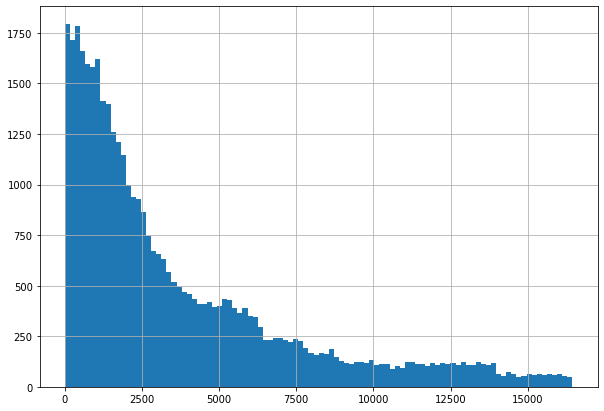

In [30]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

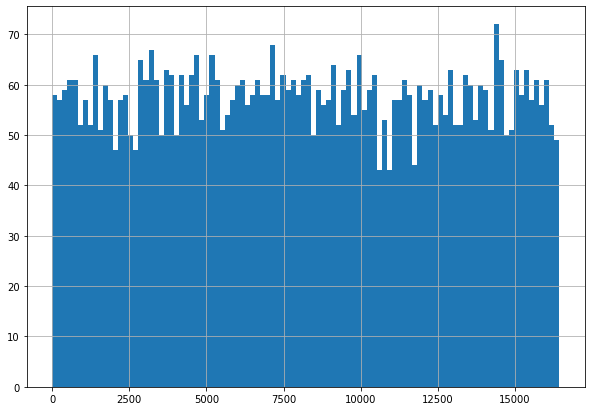

In [31]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

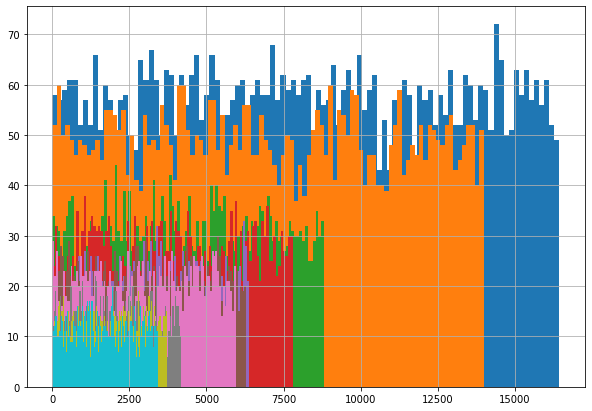

In [32]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

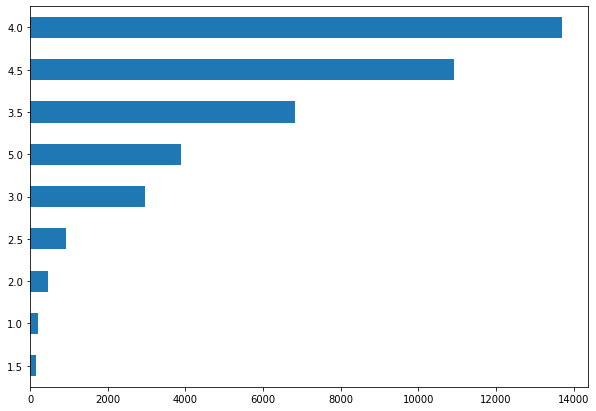

In [33]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

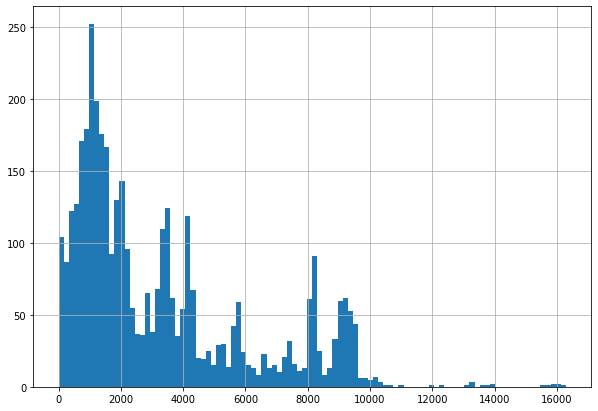

In [34]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

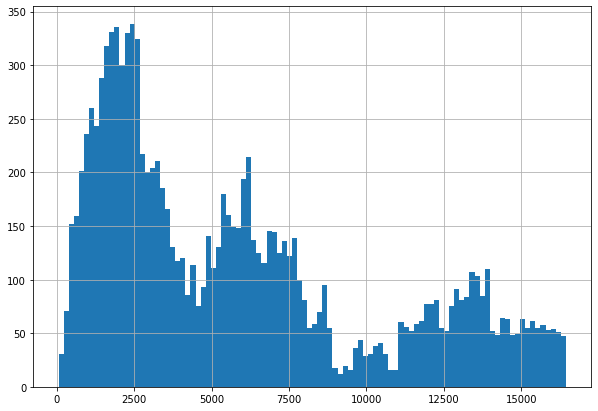

In [35]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### Корреляция признаков

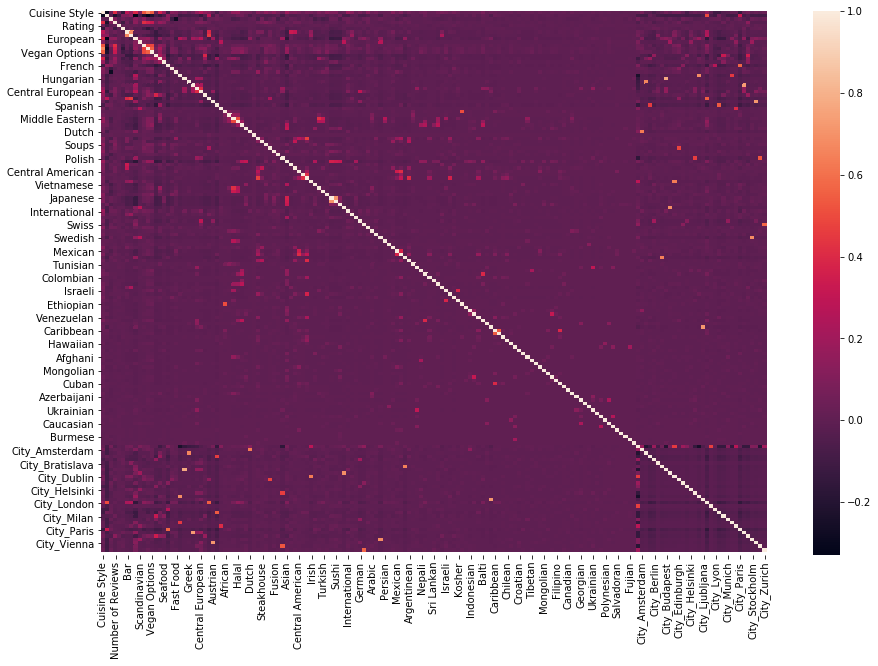

In [36]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [37]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [38]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''

    df_output = df_input.copy()

    # ################### 1. Предобработка ##############################################################
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id', 'ID_TA', ], axis=1, inplace=True)

    # ################### 2. NAN ##############################################################
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    

    # ################### 3. Encoding ##############################################################
    # 1.City
    df_output = pd.get_dummies(df_output, columns=['City', ], dummy_na=True)
    
    # 2.Price Range
    dict_price = {'$$ - $$$': 2, '$': 1, '$$$$': 3}
    df_output['Price Range'] = df_output['Price Range'].map(dict_price)
    df_output['Price Range'].fillna(
        df_output['Price Range'].mean(), inplace=True)

    # ################### 4. Feature Engineering ####################################################
    # 1. ВВП
    # Была видвинута гипотеза, что на уровень ресторанов и их рейтинг влияет развитие страны, т.е. ВВП
    df_output['country'] = df_input['City'].map(dict_country)
    # Создаем новый столбец, ВВП на душу населения
    df_output['vvp'] = df_output['country'].map(dict_vvp)
    # 2. Cuisine Style
    # Создаем словарь, город и соответствующая наиболее распространенная кухня
    cuisin = {}
    for i in data['City'].unique().tolist():
        cuisin[i] = data[data['City'] == i]['Cuisine Style'].mode()[0]

    mask = data['Cuisine Style'].astype('str').isin(['NaN', 'nan'])
    data.loc[mask, 'Cuisine Style'] = data.loc[mask,'City'].map(cuisin)

# какие кухни представлены в ресторанах
# создадим список всех кухонь
    list_cuisin = []
    for c in data[data['Cuisine Style'].isnull() == False]['Cuisine Style'].tolist():
        s = c[1:-1].split(',')
        for x in s:
            x = x.strip()
            if x[1:-1] not in list_cuisin:
                list_cuisin.append(x[1:-1])
    def find_item(cell):
        if item in cell:
            return 1
        return 0
    for item in list_cuisin:
        df_output[item] = df_input['Cuisine Style'].apply(find_item)
    df_output['Cuisine Style'] = (df_input['Cuisine Style'].str.count(',')+1)
    df_output['Cuisine Style'].fillna(1, inplace=True)

    # ################### 5. Clean ####################################################
    # Модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [
        s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis=1, inplace=True)
    df_output.drop(['City_nan'], axis=1, inplace=True)
    return df_output

#### Запускаем и проверяем что получилось

In [39]:
df_preproc = preproc_data(data)
#df_preproc.sample(10)

In [40]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 163 entries, Cuisine Style to Latvian
dtypes: float64(5), int64(127), uint8(31)
memory usage: 51.8 MB


In [41]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [42]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [43]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 162), (40000, 162), (40000, 161), (32000, 161), (8000, 161))

# Model 
Сам ML

In [44]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [45]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [46]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [47]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20837124999999998


In [48]:
#0.20837124999999998

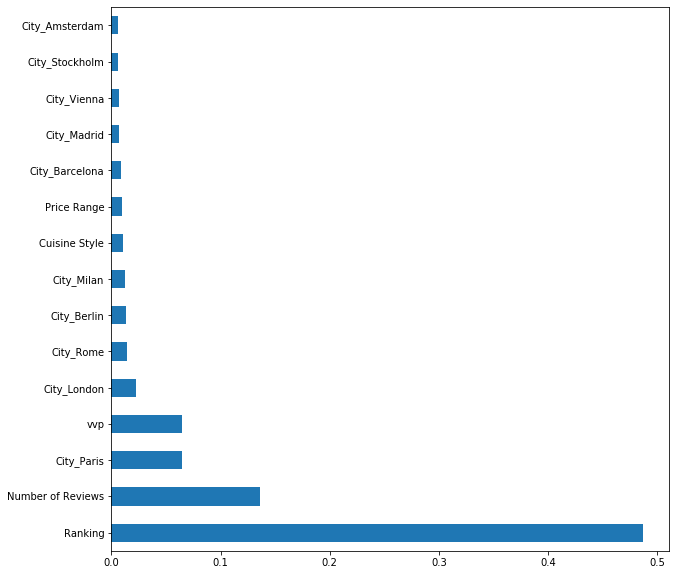

In [49]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [50]:
test_data.sample(10)

,Cuisine Style,Ranking,Price Range,Number of Reviews,Rating,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,...,Albanian,Central Asian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian
6351,1,2329.0,1.815129,2.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4111,3,1017.0,1.000000,23.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6176,3,764.0,2.000000,37.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4885,6,2394.0,2.000000,28.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1395,1,7313.0,1.815129,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6575,3,1545.0,2.000000,99.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2787,7,428.0,2.000000,366.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1727,2,736.0,2.000000,50.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
872,3,3621.0,1.815129,12.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
503,2,1508.0,1.000000,15.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
test_data = test_data.drop(['Rating'], axis=1)

In [52]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [53]:
predict_submission = round_of_rating(model.predict(test_data))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished


In [54]:
predict_submission

array([3. , 4.5, 4.5, ..., 3. , 4.5, 4.5])

In [55]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.5
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,1.5
7,id_7,3.0
8,id_8,4.0
9,id_9,4.5
